In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/car_data/car.data",names=['buying','maint','doors','persons','lug_boot','safety','class'])
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [5]:
data[data['doors']=='4']

,buying,maint,doors,persons,lug_boot,safety,class
54,vhigh,vhigh,4,2,small,low,unacc
55,vhigh,vhigh,4,2,small,med,unacc
56,vhigh,vhigh,4,2,small,high,unacc
57,vhigh,vhigh,4,2,med,low,unacc
58,vhigh,vhigh,4,2,med,med,unacc
...,...,...,...,...,...,...,...
1696,low,low,4,more,med,med,good
1697,low,low,4,more,med,high,vgood
1698,low,low,4,more,big,low,unacc
1699,low,low,4,more,big,med,good


In [6]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [8]:
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [9]:
data['class'],class_names = pd.factorize(data['class'])
class_names

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')

In [10]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,3
1724,low,low,5more,more,med,high,2
1725,low,low,5more,more,big,low,0
1726,low,low,5more,more,big,med,3


In [11]:
data['class'].unique()

array([0, 1, 2, 3])

In [12]:
data_backup = data.copy()

In [13]:
data_backup.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [14]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_= pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [15]:
x= data.iloc[:,0:-1]
y= data.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
x.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

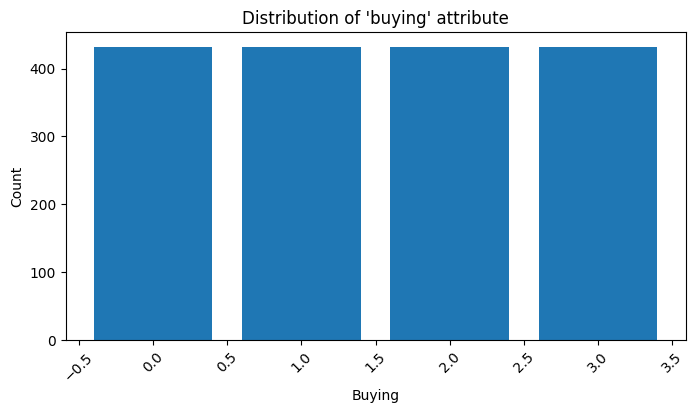

In [21]:
buying_counts = data['buying'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(buying_counts.index, buying_counts.values)
plt.title("Distribution of 'buying' attribute")
plt.xlabel("Buying")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

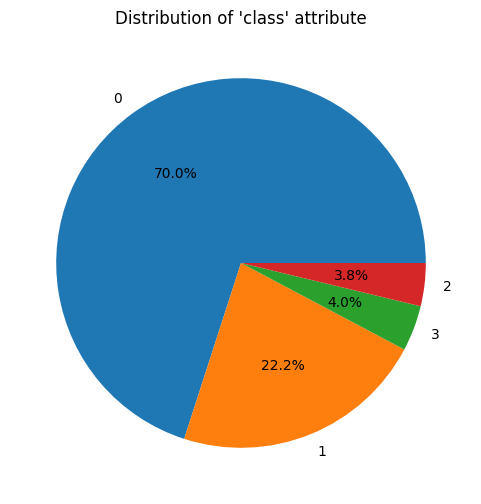

In [22]:
class_counts = data['class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title("Distribution of 'class' attribute")
plt.show()

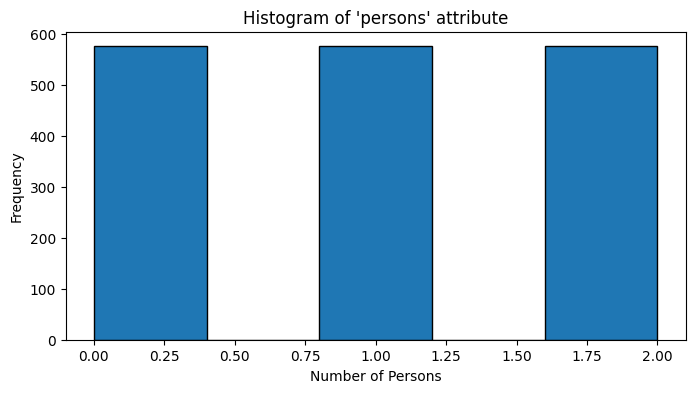

In [23]:
plt.figure(figsize=(8, 4))
plt.hist(data['persons'], bins=5, edgecolor='k')
plt.title("Histogram of 'persons' attribute")
plt.xlabel("Number of Persons")
plt.ylabel("Frequency")
plt.show()

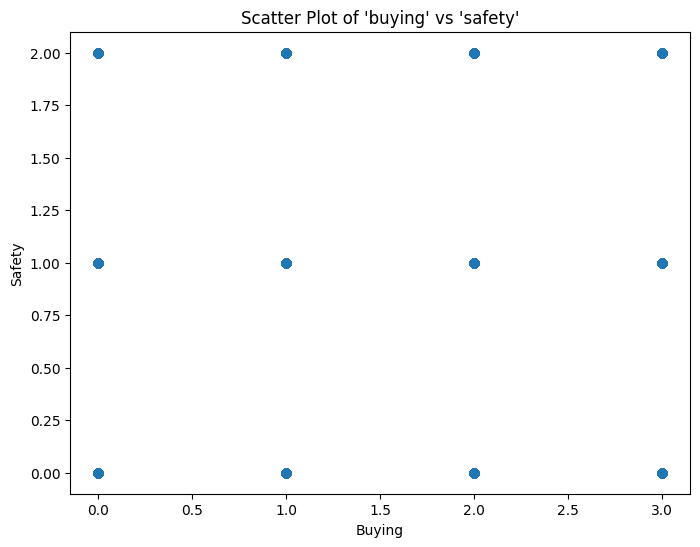

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(data['buying'], data['safety'], alpha=0.5)
plt.title("Scatter Plot of 'buying' vs 'safety'")
plt.xlabel("Buying")
plt.ylabel("Safety")
plt.show()

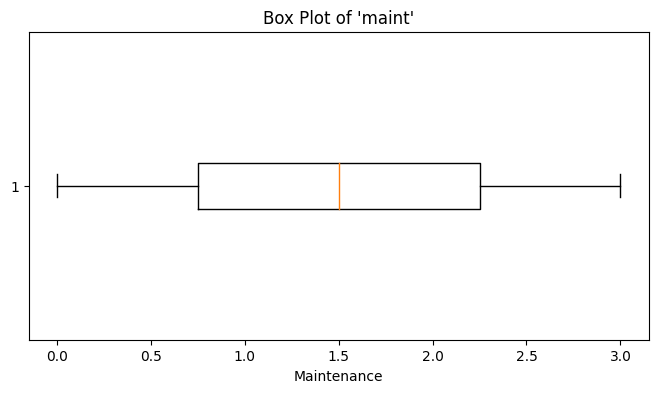

In [25]:
plt.figure(figsize=(8, 4))
plt.boxplot(data['maint'], vert=False)
plt.title("Box Plot of 'maint'")
plt.xlabel("Maintenance")
plt.show()

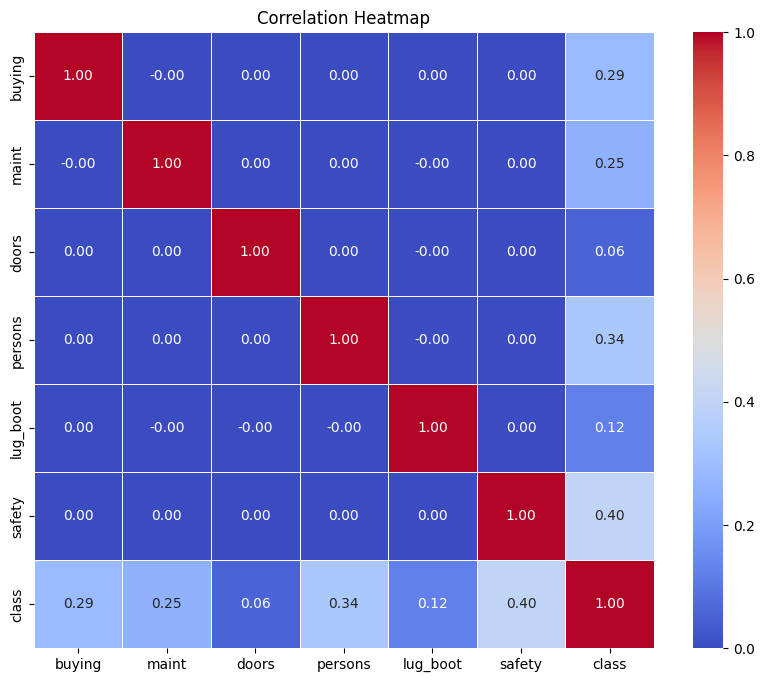

In [27]:
# Encode categorical variables to numeric values
data_encoded = data.apply(lambda x: x.astype('category').cat.codes)
# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
from sklearn import tree, metrics
dtree = tree.DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
y_train_pred = dtree.predict(x_train)

In [28]:
accuracy = metrics.accuracy_score(y_train,y_train_pred)
print("Test accuracy:{:.2f}".format(accuracy))

Test accuracy:1.00
